<font size=48>Machine Learning - KMeans Clustering(Enhanced)</font><br>
## Noor Hannan bin Noor Hamsuruddin (1211104293)

This Notebook will help teach students about K-Means Clustering in Machine Learning




**What is K Means Clustering?**<br>
Essentially, K Means clustering is a method in which a group of data points are grouped together into clusters, depending on how similar they are to each other.

On the surface, it can be simply said that K Means clustering is just the grouping of a few dots that are grouped up into groups in a graph.

**Why do we use K Means Clustering?**<br>
The main purpose of clustering of data by K Means clustering is for the sake of an easier analysis and interpretation of the values that can be seen in a dataset. As an example, with K Means clustering, we can group types of customers based off their spending and salary.

**How do we perform K Clustering on a dataset?**<br>
To group data in a dataset, we can use the code below. Lines of code that are essential to the K Means clustering process will be marked as so.

In [ ]:
#IMPORT FROM GOOGLE COLAB, UNCOMMENT IF NEEDED
#from google.colab import drive
#import os

#drive.mount('/content/drive')

In [ ]:
#Set drive path, relative to the main drive
#path = "/content/drive" + "/Path/to/your/notebook/folder" #Change to the folder which the ipynb file + data is stored, remove if in the main drive
#os.chdir(path)
#!pwd

In [7]:
#Import essential python modules
import pandas as pd #pd can be used as a short form of pandas in future lines of code
import numpy as np

In [3]:
#Load the dataset to be used in the lab. In this case, the dataset is about vehicle insurance
dataset = pd.read_csv("customer.csv") #Import the csv file. Has to be in the same directory as the IPYNB file

dataset.head() #View the first few rows of the dataset
len(dataset) #How many rows the dataset has
print(dataset.dtypes) #Show all datatype

test_data = dataset.sample(n=200,random_state=42) #Grabs 200 pieces of random data 

Unnamed: 0                      int64
Customer                       object
State                          object
CustomerLifetimeValue         float64
Response                       object
Coverage                       object
Education                      object
EffectiveToDate                object
EmploymentStatus               object
Gender                         object
Income                          int64
LocationCode                   object
MaritalStatus                  object
MonthlyPremiumAuto              int64
MonthsSinceLastClaim            int64
MonthsSincePolicyInception      int64
NumberofOpenComplaints          int64
NumberofPolicies                int64
PolicyType                     object
Policy                         object
RenewOfferType                 object
SalesChannel                   object
ClaimAmount                   float64
VehicleClass                   object
VehicleSize                    object
dtype: object


From the previous code cell, we can see the datatypes of each column. They can be divided into two categories, categorical and numerical. For example, the State, Gender and Education go under categorical, where Income, Customer Lifetime Value and ClaimAmount would be numerical. For this notebook, we will try to categorise each customer by their lifetime value and purchasing behaviour.

In [4]:
#Some data preprocessing
null_values = dataset.isnull().sum() 
print("Null values in each column:")
print(null_values)
#Makes sure there are no null values that can affect the outcome

Null values in each column:
Unnamed: 0                    0
Customer                      0
State                         0
CustomerLifetimeValue         0
Response                      0
Coverage                      0
Education                     0
EffectiveToDate               0
EmploymentStatus              0
Gender                        0
Income                        0
LocationCode                  0
MaritalStatus                 0
MonthlyPremiumAuto            0
MonthsSinceLastClaim          0
MonthsSincePolicyInception    0
NumberofOpenComplaints        0
NumberofPolicies              0
PolicyType                    0
Policy                        0
RenewOfferType                0
SalesChannel                  0
ClaimAmount                   0
VehicleClass                  0
VehicleSize                   0
dtype: int64


Before we start with K Means clustering, we should visualise the states of the data before and after clustering, to see how the clustering changes the output graph. We start with showing the output for the unclustered data. For this notebook, we will view the Customer Lifetime Value against Customer Income.

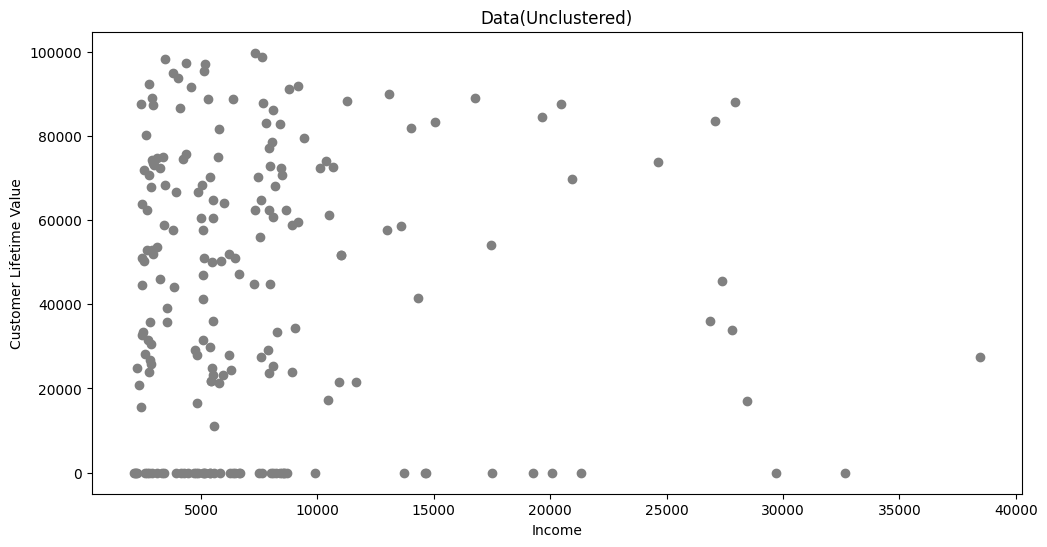

In [5]:
import matplotlib.pyplot as plt

#Select all relevant values that are going to be used for clustering
X = test_data[['CustomerLifetimeValue','Income']].values

plt.figure(figsize=(12,6))

plt.scatter(X[:,0],X[:,1], color='gray', marker='o')
plt.title("Data(Unclustered)")
plt.ylabel("Customer Lifetime Value")
plt.xlabel('Income')
plt.show()

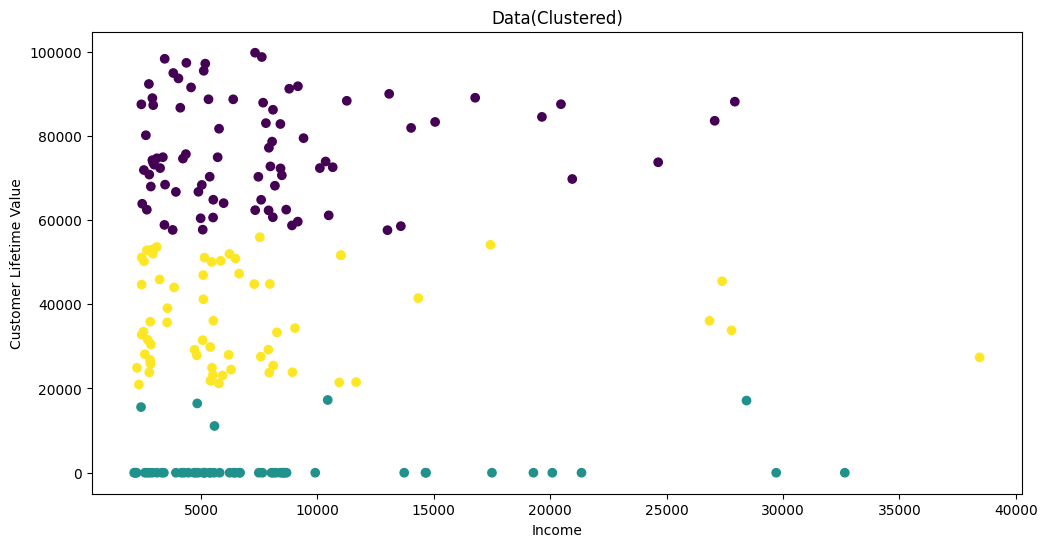

In [6]:
#Begin K Means clustering using sklearn kmeans package⭐⭐⭐
from sklearn.cluster import KMeans

#The usual kmeans function, important
#======================================
#Create the model with 3 clusters
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

labels = kmeans.predict(X)
#=====================================

#Visualise the clusters
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Data(Clustered)")
plt.ylabel("Customer Lifetime Value")
plt.xlabel('Income')
plt.show()


In the scatter plot above, we can see all the points have been colorised, into three group sets. For this instance, we can assume that they have been grouped together into three groups based off the customer lifetime value. In this case, we can make our own decisions on how to group them, such as low value customer(lower cluster), valuable customer(middle cluster) and high values customers(top cluster).<br>

However, note that the number of clusters is self defined by us, the user(in this case, 3). 3 is usually the starting point for using the K Means clustering function, before performing manual adjustments to get the ideal number of clusters. However, the ideal number of clusters may become more subjective due to personal opinions. <br>

Another method we can use to decide the ideal number of clusters using programs is by using the Elbow Method related functions. This method is a form of graphical testing that runs K Means clustering a number of times for range(this number can vary) and then returns a line graph that is shaped like an elbow(Hence, the Elbow Method name). In that graph, we can find the ideal number of clusters.

In [1]:
#Install kneed if you dont already have it yet ⭐⭐⭐
#!pip install kneed

from kneed import KneeLocator #import KneeLocator from kneed

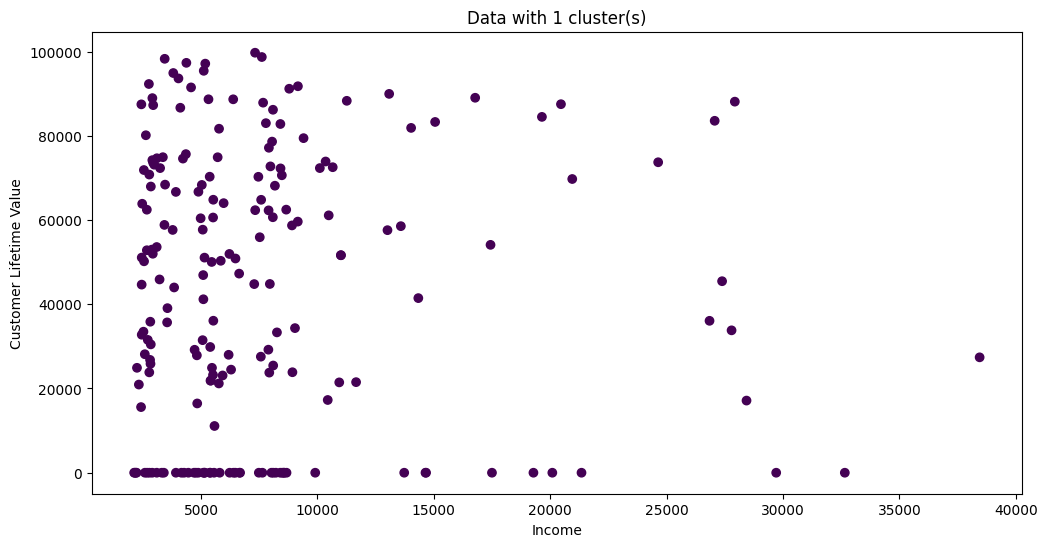

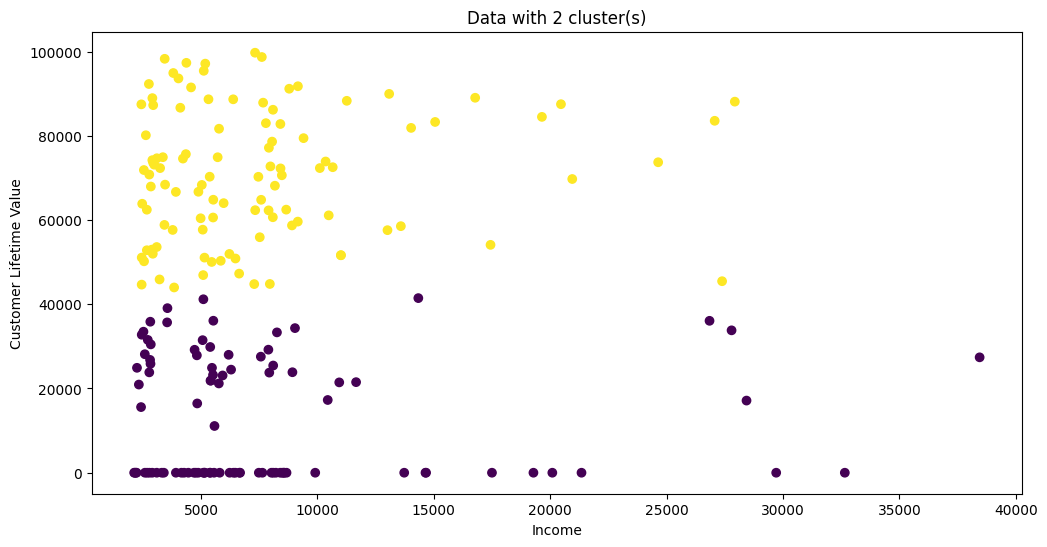

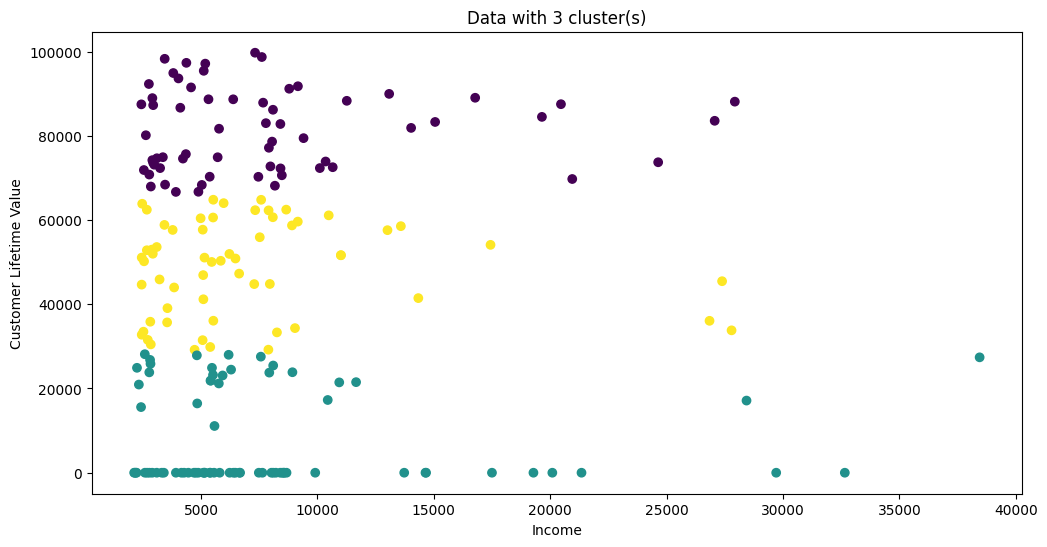

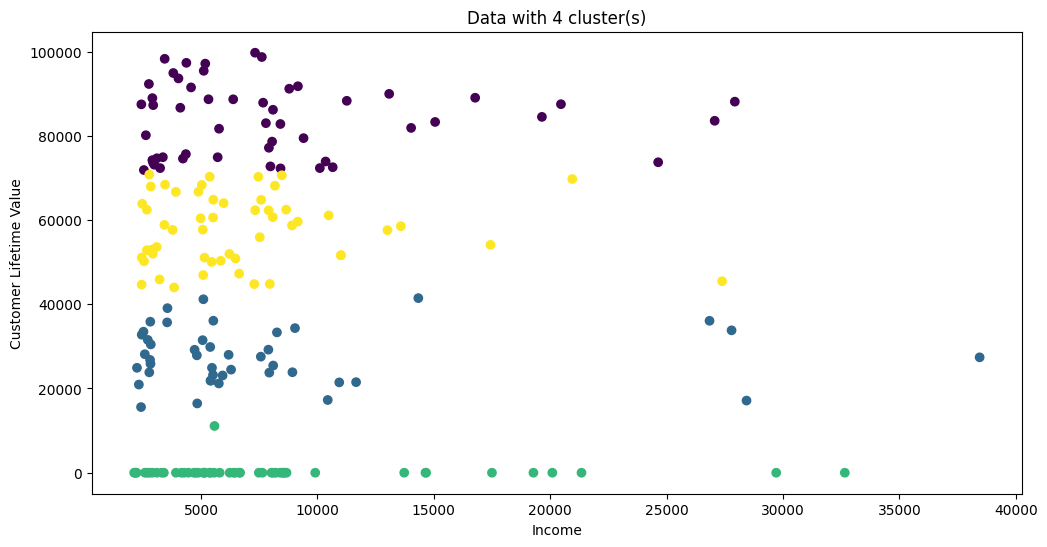

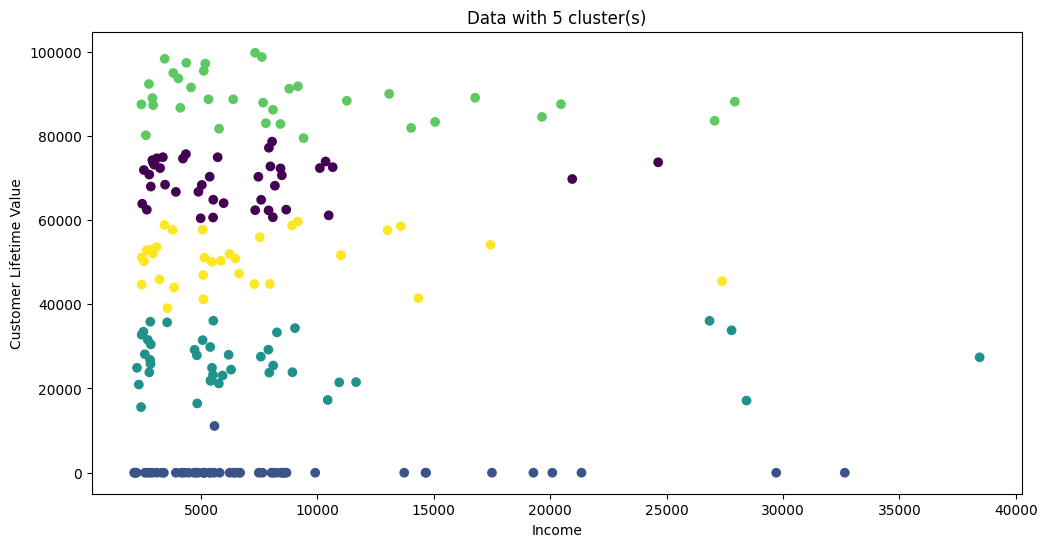

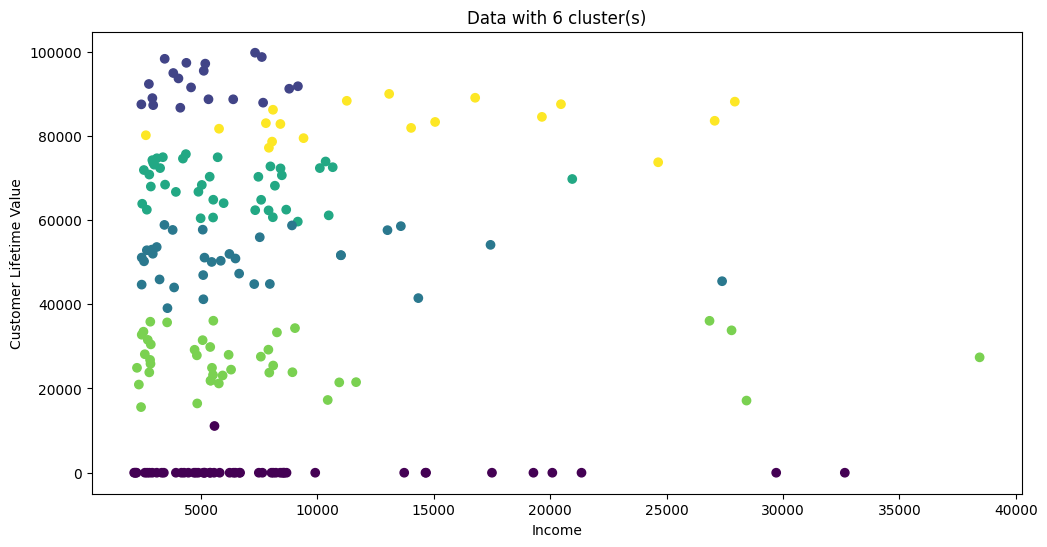

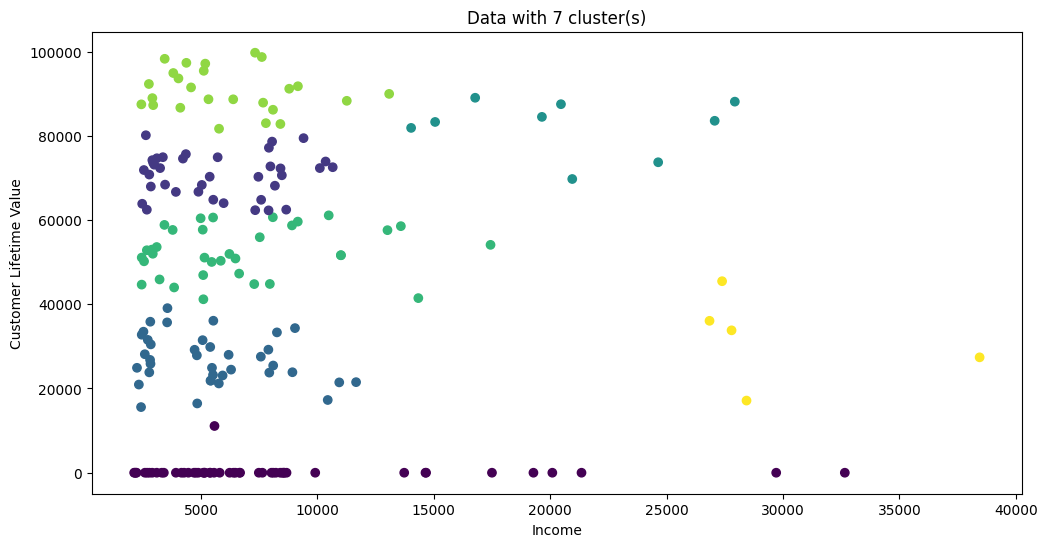

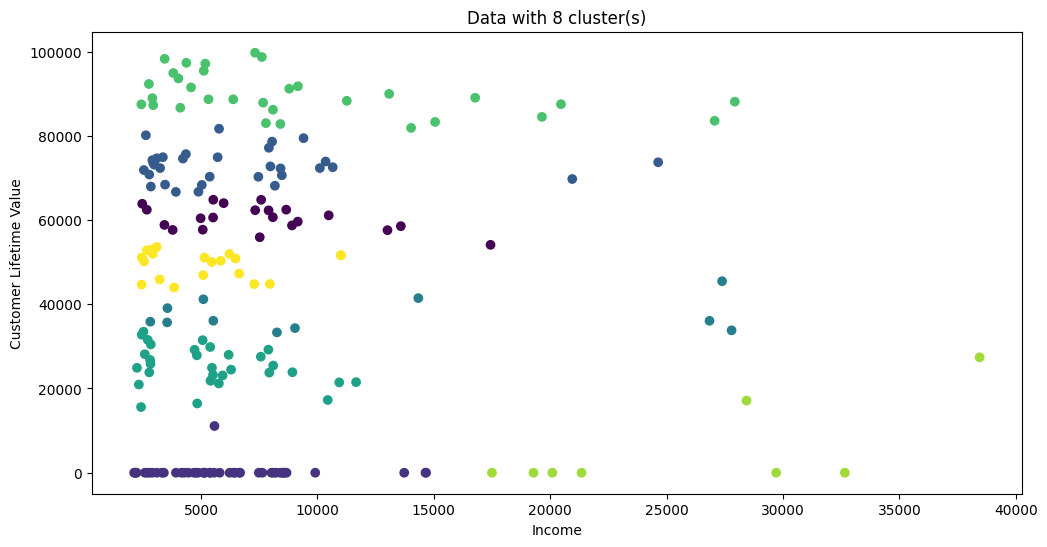

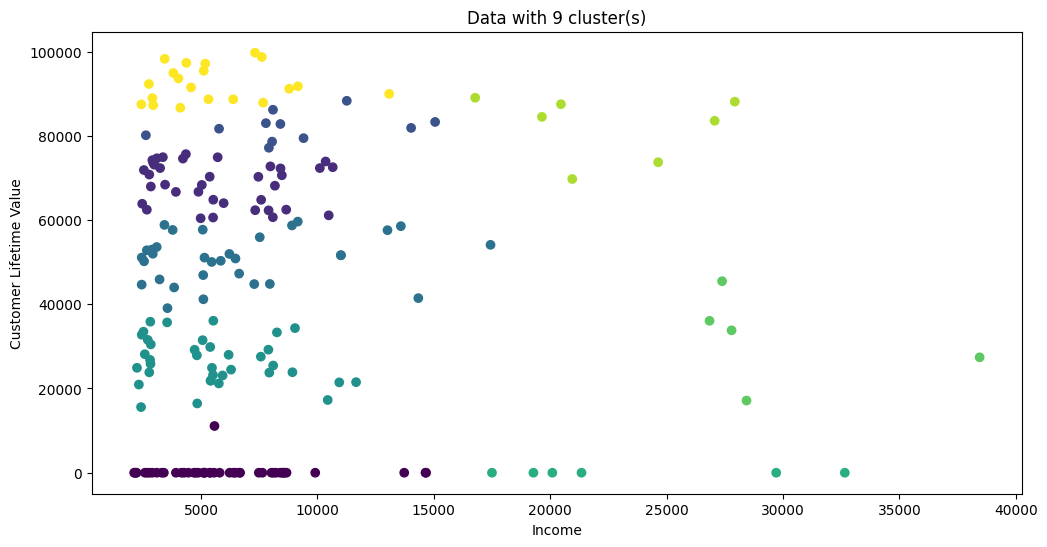

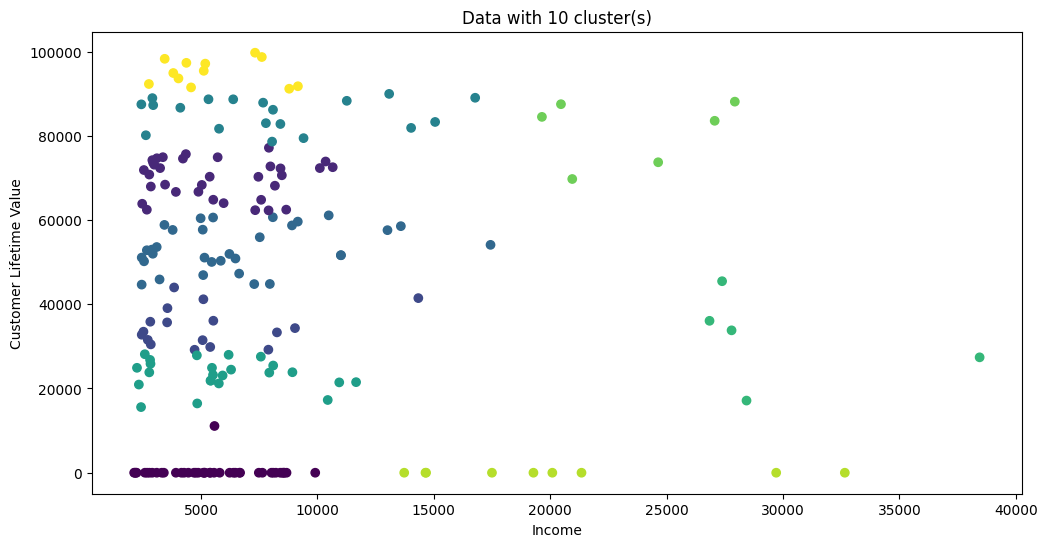

In [19]:
sse = []

k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

    labels = kmeans.predict(X)
    plt.figure(figsize=(12,6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f"Data with {k} cluster(s)")
    plt.ylabel("Customer Lifetime Value")
    plt.xlabel('Income')
    plt.show()
    

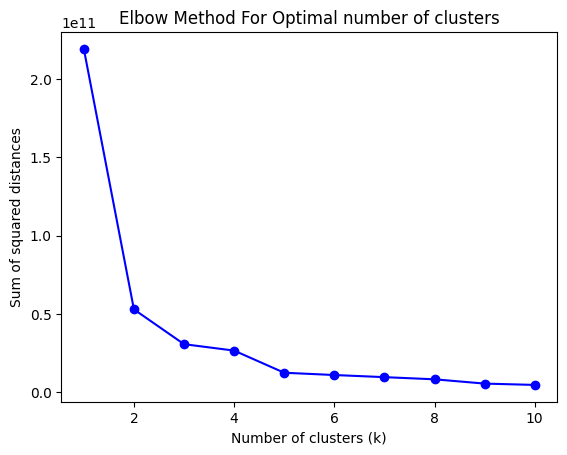

In [18]:
#Plot the elbow graph ⭐⭐⭐
plt.plot(k_values, sse, 'bo-') 
plt.xlabel('Number of clusters (k)') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal number of clusters') 
plt.show()

Through the Elbow Method, the best way to pick which spot in the graph and which is the most suitable number of clusters to pick for clustering is to select the point where the significant reduction in the sum of squared distances(Y Axis) becomes completely negligible.(Or in simpler terms, the dots stop getting significantly lower on the graph).<br>

From the graph, we can see a significant drop from 1 cluster to 2 clusters, as well as from 2 to 3, 3 to 4, and 4 to 5. Afterwards, from 5 to 6 onwards, the reduction of sum of squared distances becomes very low. Thus, programmatically, we can say that 5 is the ideal number of clusters for our data.

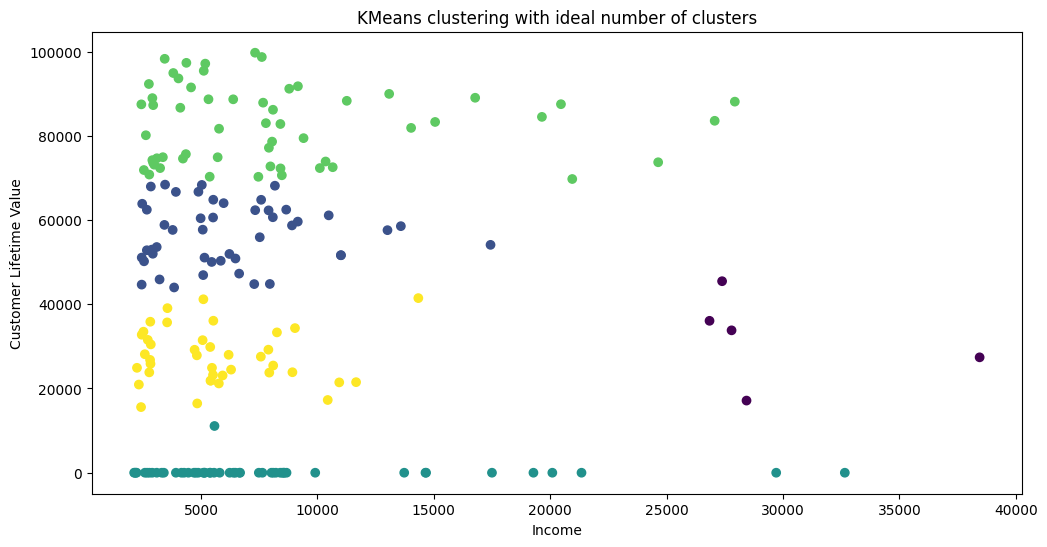

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("KMeans clustering with ideal number of clusters")
plt.ylabel("Customer Lifetime Value")
plt.xlabel('Income')
plt.show()